# Imports

In [8]:
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Dataset Summary

**Name:** DFC15_multilabel

In [1]:
BASE_DATA_DIR = "/home/jovyan/work/data/"
DATASET_DIR = "DFC15_multilabel"
FULL_DATASET_DIR = os.path.join(BASE_DATA_DIR, DATASET_DIR)
TRAIN_IMAGES_PATH = os.path.join(FULL_DATASET_DIR, "images_tr")
TEST_IMAGES_PATH = os.path.join(FULL_DATASET_DIR, "images_test")

print(f"Dataset in {FULL_DATASET_DIR}")
print(f"Contents of dataset dir is {os.listdir(FULL_DATASET_DIR)}")

Dataset in /home/jovyan/work/data/DFC15_multilabel
Contents of dataset dir is ['images_tr', 'images_test', 'multilabel.csv', 'multilabel.mat']


In [2]:
multilabel_df = pd.read_csv(os.path.join(FULL_DATASET_DIR, "multilabel.csv"))
multilabel_df.head()

,image\label,impervious,water,clutter,vegetation,building,tree,boat,car
0,1,1,1,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0
3,4,1,1,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0


In [3]:
print("Total number of samples: ", multilabel_df.shape[0])
print("Total number of features: ", multilabel_df.shape[1] - 1)

Total number of samples:  3342
Total number of features:  8


In [4]:
multilabel_df.describe()

,image\label,impervious,water,clutter,vegetation,building,tree,boat,car
count,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000
mean,1671.500000,0.937463,0.298624,0.565829,0.324955,0.299521,0.077199,0.080790,0.210952
std,964.896627,0.242165,0.457723,0.495722,0.468428,0.458117,0.266947,0.272553,0.408045
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,836.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1671.500000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2506.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,3342.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
multilabel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   image\label  3342 non-null   int64
 1   impervious   3342 non-null   int64
 2   water        3342 non-null   int64
 3   clutter      3342 non-null   int64
 4   vegetation   3342 non-null   int64
 5   building     3342 non-null   int64
 6   tree         3342 non-null   int64
 7   boat         3342 non-null   int64
 8   car          3342 non-null   int64
dtypes: int64(9)
memory usage: 235.1 KB


In [7]:
print("Number of images in train set:", len(glob.glob(os.path.join(TRAIN_IMAGES_PATH, "*.png"))))
print("Number of images in test set:", len(glob.glob(os.path.join(TEST_IMAGES_PATH, "*.png"))))

Number of images in train set: 2673
Number of images in test set: 669


In [11]:
multilabel_df["in_train"] = np.zeros((multilabel_df.shape[0],), dtype=int)

In [13]:
for image_file in glob.glob(os.path.join(TRAIN_IMAGES_PATH, "*.png")):
    basename = os.path.basename(image_file)
    image_id = os.path.splitext(basename)[0]
    
    multilabel_df.loc[multilabel_df["image\\label"] == int(image_id), "in_train"] = 1

In [14]:
print("Number of images in train set:", multilabel_df["in_train"].sum())
print("Number of images in test set:", (multilabel_df["in_train"] == 0).sum())

Number of images in train set: 2673
Number of images in test set: 669


## Label Analysis

Since *impervious* label overwhelm the other labels by far, I just removed it from the dataset.

In [15]:
multilabel_df.drop("impervious", axis=1, inplace=True)
multilabel_df["total_label_count"] = multilabel_df.drop(["image\\label", "in_train"], axis=1).sum(axis=1)

In [16]:
multilabel_df.head()

,image\label,water,clutter,vegetation,building,tree,boat,car,in_train,total_label_count
0,1,1,0,0,0,0,0,0,1,1
1,2,1,0,0,0,0,0,0,1,1
2,3,1,0,0,0,0,0,0,0,1
3,4,1,0,0,0,0,0,0,1,1
4,5,1,0,0,0,0,0,0,1,1


In [17]:
multilabel_df["total_label_count"].describe()

count    3342.000000
mean        1.857870
std         0.954438
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: total_label_count, dtype: float64

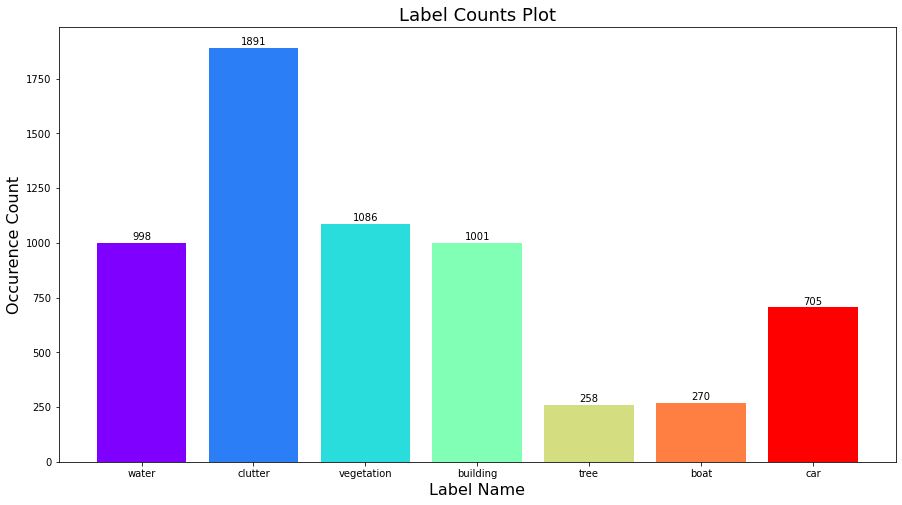

In [18]:
plt_data = multilabel_df.drop(["image\\label", "total_label_count", "in_train"], axis=1).sum(axis=0)

fig, ax = plt.subplots(figsize=(15, 8))

ax.bar(plt_data.index, plt_data.values, color=matplotlib.cm.rainbow(np.linspace(0, 1, 7)))

rects = ax.patches
labels = plt_data.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom")
plt.title("Label Counts Plot", fontsize=18)
plt.xlabel("Label Name", fontsize=16)
plt.ylabel("Occurence Count", fontsize=16)

plt.show()

## Label Correlations

In [19]:
just_labels_df = multilabel_df.drop(["image\\label", "total_label_count", "in_train"], axis=1)
just_labels_df.corr()

,water,clutter,vegetation,building,tree,boat,car
water,1.000000,-0.267381,-0.105124,-0.201152,-0.068699,0.425553,-0.159502
clutter,-0.267381,1.000000,-0.486573,-0.426228,-0.296263,-0.048236,-0.246978
vegetation,-0.105124,-0.486573,1.000000,0.409673,0.412089,-0.168181,0.291117
building,-0.201152,-0.426228,0.409673,1.000000,0.104566,-0.054825,0.523324
tree,-0.068699,-0.296263,0.412089,0.104566,1.000000,-0.085748,0.023561
boat,0.425553,-0.048236,-0.168181,-0.054825,-0.085748,1.000000,-0.005267
car,-0.159502,-0.246978,0.291117,0.523324,0.023561,-0.005267,1.000000


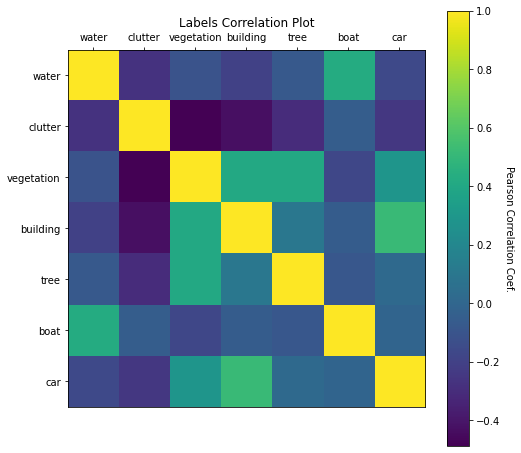

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.xaxis.tick_top()
im = ax.imshow(just_labels_df.corr())
plt.xticks(ticks=np.arange(just_labels_df.shape[1]), labels=just_labels_df.columns)
plt.yticks(ticks=np.arange(just_labels_df.shape[1]), labels=just_labels_df.columns)

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Pearson Correlation Coef.", rotation=-90, va="bottom")

plt.title("Labels Correlation Plot")

plt.show()